# Test 2: Pure sine with noise

One possible approach to evaluating the frequency detection system's performance in the presence of noise, is to subject it to a set of simulated input signals, where the noise power increses with each iteration. This way, we can present a plot showing e.g. average frequency estimate, and estimate error expressed as a function of Signal-to-Noise Ratio (SNR).

Create a python program which generates a series of test signals with progressively increasing levels of white gaussian noise, and feeds it into the attached function `freq_detection`. Subsequently, your program should provide an analysis of the outuput from the function `freq_detection` for the various noise levels, which can take the form of a plot showing the frequency detection system's error as a function of SNR. This will be useful when evaluating the frequency detection system's performance in the presence of noise. Measuring the frequency estimate error in such a way will allow us to evaluate two things:
1. How precise the frequency estimate is
2. How robust the frequency detection system is to noise interference

PS. for a pure sine buried in additive noise, the Signal-to-Noise Ratio can be calculated with the following formula:<br>
$$SNR = \frac{P_{sin}}{P_{noise}} = \frac{A^2/2}{\sigma_{noise}^2}$$

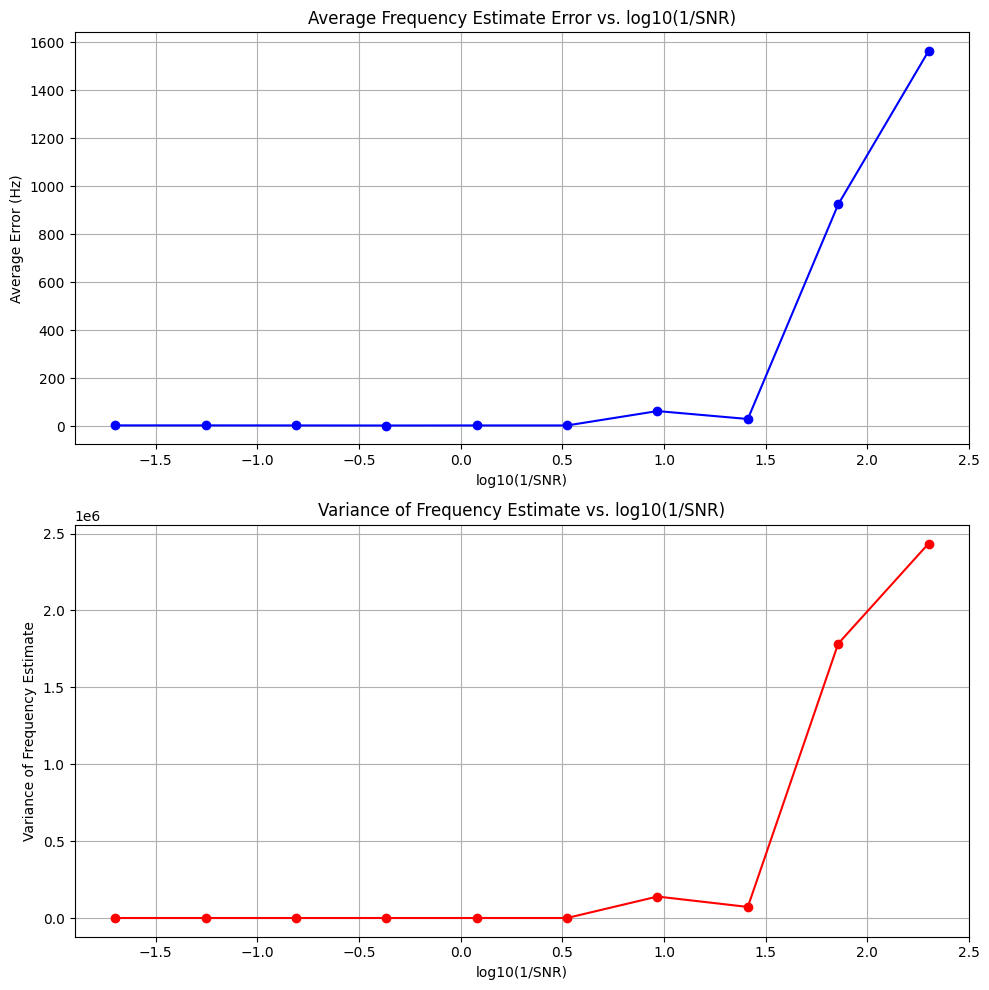

In [29]:
from baseline_algorithm import freq_detection
import numpy as np
import matplotlib.pyplot as plt
# WRITE YOUR CODE IN THIS CELL:

fs = 10_000  # Sampling frequency
f_true = 885  # True sine wave frequency
T = 4  # Duration of the signal in seconds
A = 1.0  # Amplitude of the sine wave
N = T * fs

SNRs = []
avgEst = []
avgError = []
vars = []

Signal = A * np.sin(2 * np.pi * f_true * np.arange(N) / fs)
noisePWR = np.logspace(-2,2,10)


for noiseVar in noisePWR:
    noise = np.random.normal(scale=np.sqrt(noiseVar), size=N) 
    noisy_signal = Signal + noise
    _, f_est = freq_detection(noisy_signal, fs, N=1024)
    
    avgEstFreq = np.mean(f_est)
    var = np.var(f_est)
    
  
    error = np.abs(avgEstFreq - f_true)
    
    snr = (A**2 / 2) / noiseVar
    
    invSNR = 1 / snr
    SNRs.append(invSNR)
    
    avgEst.append(avgEstFreq)
    avgError.append(error)
    vars.append(var)


logSNR = np.log10(SNRs)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))


ax1.plot(logSNR, avgError, marker='o', linestyle='-', color='b')
ax1.set_xlabel('log10(1/SNR)')
ax1.set_ylabel('Average Error (Hz)')
ax1.set_title('Average Frequency Estimate Error vs. log10(1/SNR)')
ax1.grid(True)

ax2.plot(logSNR, vars, marker='o', linestyle='-', color='r')
ax2.set_xlabel('log10(1/SNR)')
ax2.set_ylabel('Variance of Frequency Estimate')
ax2.set_title('Variance of Frequency Estimate vs. log10(1/SNR)')
ax2.grid(True)

plt.tight_layout()
plt.show()


[Here](Figures/sineTest_LF.png) is an image showing a *suggestion* for what or test output may look like for a tone of $885 Hz$. As we can see, the frequency detection system produces a stable output in the presence of noise, up to a point where the noise power is $\approx 20$ times greater than the sinusoid power. However, there is always some estimation error due to the limited resolution bandwidth offered by the FFT, resulting in the average error never going below $\approx 3.6 \text{ Hz}$.